In [1]:
%matplotlib inline
from itertools import count
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import style
from scipy.stats import norm
from statistics import variance 

40.82869053241528 81.18198161200014 1666.9819705917403


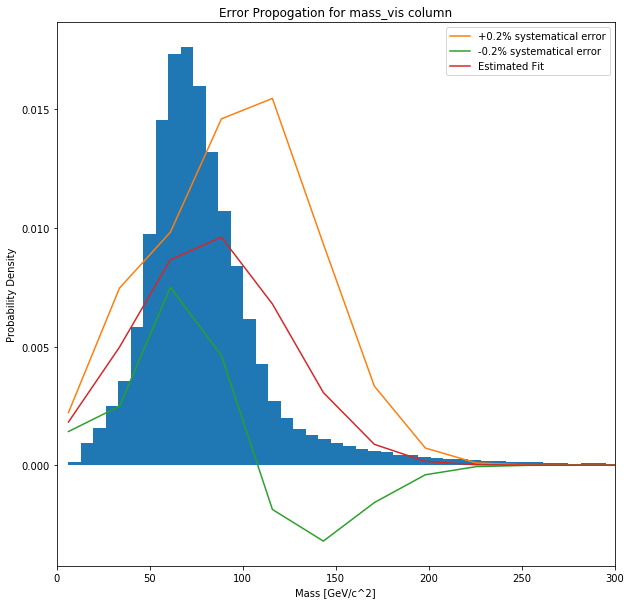

In [2]:
df = pd.read_csv('training.csv')

mass_vis = df["DER_mass_vis"]
std = mass_vis.std()
mean = mass_vis.mean()
variance = variance(mass_vis)
print(std, mean, variance)
domain = np.linspace(np.min(mass_vis), np.max(mass_vis))
z = (norm.pdf(domain, mean, std))
derivatives = []

for i in range(len(z)-1):
    dzda = z[i+1]-z[i]
    derivatives.append(abs(dzda))
    
ZwithErrorsP = []
ZwithErrorsM = []

for i in range(len(domain) - 1):
    e = domain[i] * 0.02
    Zp = z[i]+derivatives[i] * e
    Zm = z[i]-derivatives[i] * e
    ZwithErrorsP.append(Zp)
    ZwithErrorsM.append(Zm)
    
plt.figure(figsize = (10, 10))
plt.xlim(0, 300)

plt.title("Error Propogation for mass_vis column")
plt.xlabel("Mass [GeV/c^2]")
plt.ylabel("Probability Density")

plt.hist(mass_vis, 200, density = True)    
plt.plot(domain[:-1],ZwithErrorsP,label = "+0.2% systematical error")
plt.plot(domain[:-1],ZwithErrorsM,label = "-0.2% systematical error")
plt.plot(domain,norm.pdf(domain,mean,std), label = "Estimated Fit")
plt.legend()

Example Gaussian fitting:

In [3]:
import math

pi=math.pi
z = []
birliste = []
errortablez = []
tamlisteson = []
x = mass_vis.to_numpy()
errorx = std / (len(x) ** (1/2))
maxdegertest = 1 / (std * (2*pi) ** (1/2))

for i in range(0, 50):
    zanlikdeger = maxdegertest * (math.exp(-(domain[i]-mean)/(2*(std**2))))
    z.append(zanlikdeger)
    errorz = abs((z[i] * (domain[i]-mean))/(-(std**2))) * errorx
    errortablez.append(errorz)
    tamlisteson.append([domain[i],zanlikdeger,errorz])